In [37]:
import pandas as pd

import matplotlib.pyplot as plt


In [38]:
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [39]:
dataset.shape[0]

1338

In [40]:
dataset.shape[1]

6

In [41]:
one_hot_encoding = pd.get_dummies(dataset)
one_hot_encoding = one_hot_encoding.astype(int)
one_hot_encoding.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27,0,16884,1,0,0,1
1,18,33,1,1725,0,1,1,0
2,28,33,3,4449,0,1,1,0
3,33,22,0,21984,0,1,1,0
4,32,28,0,3866,0,1,1,0


In [42]:
one_hot_encoding.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [43]:
independent = one_hot_encoding[['age', 'bmi', 'children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes']]
independent

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27,0,1,0,0,1
1,18,33,1,0,1,1,0
2,28,33,3,0,1,1,0
3,33,22,0,0,1,1,0
4,32,28,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30,3,0,1,1,0
1334,18,31,0,1,0,1,0
1335,18,36,0,1,0,1,0
1336,21,25,0,1,0,1,0


In [44]:
dependent = one_hot_encoding[['charges']]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train,y_test = train_test_split(independent, dependent, test_size=0.3, random_state=0)

In [47]:
x_train , y_train

(      age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes
 1163   18   28         0           1         0          1           0
 196    39   32         0           1         0          1           0
 438    52   46         5           1         0          1           0
 183    44   26         0           1         0          1           0
 1298   33   27         2           0         1          1           0
 ...   ...  ...       ...         ...       ...        ...         ...
 763    27   26         0           0         1          1           0
 835    42   35         2           0         1          1           0
 1216   40   25         0           0         1          1           0
 559    19   35         0           0         1          1           0
 684    33   18         1           1         0          1           0
 
 [936 rows x 7 columns],
       charges
 1163     2200
 196      5649
 438     12592
 183      7419
 1298     5261
 ...       ...
 763      3070
 

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc= StandardScaler()

In [50]:
x_train = sc.fit_transform(x_train)

In [51]:
x_test = sc.transform(x_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [258]:
regression = DecisionTreeRegressor(criterion='poisson',splitter='best',max_features='sqrt')
regression

DecisionTreeRegressor(criterion='poisson', max_features='sqrt')

In [259]:
regression.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_features='sqrt')

In [260]:
y_pred = regression.predict(x_test)
y_pred

array([ 6849. ,  8930. , 44202. , 12574. ,  9193. ,  7222. ,  1615. ,
       10848. ,  6313. ,  3659. ,  4766. ,  9715. ,  7050. ,  2842. ,
       18246. ,  9414. , 30166. ,  3292. ,  6600. , 33750. , 23556.5,
       13430. , 10704. , 27533. ,  1391. ,  4673. ,  2527. ,  8538. ,
        3353. , 32108. ,  7640. , 47269. , 21797. ,  9144. , 20167. ,
        3554. ,  8978. , 38282. , 37701. ,  1880. ,  2527. ,  2866. ,
       38245. , 48673. , 38792. ,  3579. ,  9101. ,  7742. , 13725. ,
        8539. ,  2166. ,  4687. , 27218. , 46661. , 11856. , 19673. ,
        1826. ,  8442. ,  8891. , 30166. ,  1712. , 46130. , 15161. ,
       25333. ,  9563. ,  9875. , 33750. , 41949. ,  2913. ,  5253. ,
       12224. , 13937. , 16297. , 13887. , 12629. , 12233. ,  8688. ,
       32108. , 19539. , 46599. , 11657.5, 63770. ,  1391. ,  6849. ,
       39047. , 21259. ,  6360. ,  2497. , 13937. , 36950. ,  5989. ,
       17353.5,  3989. ,  9715. , 12404. ,  3956. , 39727. , 39556. ,
        4149. , 1127

In [266]:
from sklearn.metrics import r2_score

In [267]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7417465138206707

In [269]:
regression.tree_


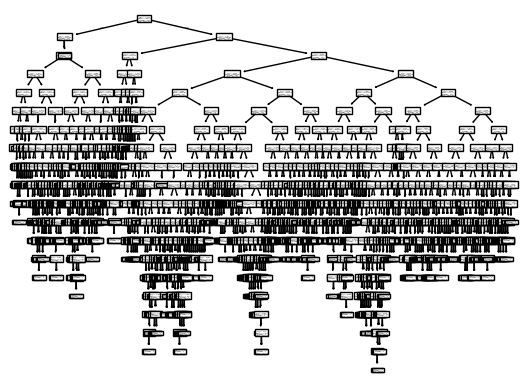

In [270]:
from sklearn import tree
tree.plot_tree(regression)
plt.show()

In [272]:
import pickle

In [273]:
file_name = "Decision_Poly_Algorith_For_Insurance.sav"
pickle.dump(regression,open(file_name,'wb'))

In [274]:
load = pickle.load(open(file_name,'rb'))
result = load.predict([[90,30,3,1,0,0,1]])
result

array([16085.])